In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
#from keras.layers.normalization import BatchNormalization

2021-08-22 18:53:55.519278: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-22 18:53:55.519298: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Text(0.5, 1.0, 'Classe5')

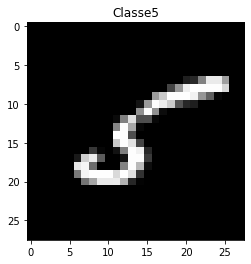

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.datasets import mnist
# from keras.models import Sequential
# from keras.layers import Dense, Flatten
# from keras.utils import np_utils
# from keras.layers import Conv2D, MaxPooling2D

(X_treinamento, y_treinamento), (X_teste, y_teste) = keras.datasets.mnist.load_data()

plt.imshow(X_treinamento[11],cmap='gray')
plt.title('Classe' +str(y_treinamento[11]))
plt.show()


In [4]:
#previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0],28,28,1)
#previsores_teste = X_teste.reshape(X_teste.shape[0],28,28,1)



In [5]:
X_treinamento = X_treinamento.astype('float32') / 255
X_teste = X_teste.astype('float32') / 255

X_treinamento = np.expand_dims(X_treinamento, -1)
X_teste = np.expand_dims(X_teste, -1)

print("x_train shape:", X_treinamento.shape)
print(X_treinamento.shape[0], "train samples")
print(X_teste.shape[0], "test samples")


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
y_treinamento = keras.utils.to_categorical(y_treinamento, 10)
y_teste = keras.utils.to_categorical(y_teste, 10)

In [7]:
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        layers.InputLayer(input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(units=128,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

NameError: name 'layers' is not defined

In [ ]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



In [ ]:
%%time
model.fit(X_treinamento, y_treinamento, batch_size=batch_size, epochs=epochs,validation_data = (X_teste,y_teste))

In [ ]:
score = model.evaluate(X_teste, y_teste, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
model.save(
    'testeMnist',
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

In [7]:
from keras.models import load_model
modelo2 = load_model('testeMnist')

2021-08-22 18:50:58.315180: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-08-22 18:50:58.315306: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-22 18:50:58.315315: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-22 18:50:58.315328: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pedro-vostro): /proc/driver/nvidia/version does not exist
2021-08-22 18:50:58.315489: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

In [8]:
modelo2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [9]:
score = modelo2.evaluate(X_teste, y_teste, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2021-08-22 18:51:35.004709: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-22 18:51:35.024951: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


Test loss: 0.03301529586315155
Test accuracy: 0.9921000003814697
